# Data Processing

### Preps

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
from datetime import datetime
from time import sleep
from tqdm import tqdm_notebook as tqdm
from wordcloud import WordCloud, STOPWORDS

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
PATH_TO_DATA = '/content/drive/My Drive/GitHub Research/'

## Issues & PRs



### Fastest growing open source projects
**Description from The State of the Octoverse**: 
*Top 10 open source projects by percent increase in contributors. This list is limited to projects that had more than 1,000 contributors in 2017—and doesn’t include projects used in MOOCs and bootcamps.*
1.	[MicrosoftDocs/azure-docs](https://github.com/MicrosoftDocs/azure-docs)	4.7X
2.	[pytorch/pytorch](https://github.com/pytorch/pytorch)	2.8X
3.	[godotengine/godot](https://github.com/godotengine/godot)	2.2X
4.	[nuxt/nuxt.js](https://github.com/nuxt/nuxt.js)	2.1X
5.	[ethereum/go-ethereum](https://github.com/ethereum/go-ethereum)	2.0X
6.	[wix/react-native-navigation](https://github.com/wix/react-native-navigation)	1.9X
7.	[spyder-ide/spyder](https://github.com/spyder-ide/spyder)	1.8X
8.	[tensorflow/models](https://github.com/tensorflow/models)	1.8X
9.	[home-assistant/home-assistant	](https://github.com/home-assistant/home-assistant)1.6X
10.	[MarlinFirmware/Marlin](https://github.com/MarlinFirmware/Marlin)	1.6X

Read the datasets

In [0]:
msaz = pd.read_csv(PATH_TO_DATA + '/data/MicrosoftDocs_azure-docs.csv', index_col = 0)
ptrch = pd.read_csv(PATH_TO_DATA + '/data/pytorch_pytorch.csv', index_col = 0)
gdt = pd.read_csv(PATH_TO_DATA + '/data/godotengine_godot.csv', index_col = 0)
nxt = pd.read_csv(PATH_TO_DATA + '/data/nuxt_nuxt_js.csv', index_col = 0)
eth = pd.read_csv(PATH_TO_DATA + '/data/ethereum_go_ethereum.csv', index_col = 0)
reactnn = pd.read_csv(PATH_TO_DATA + '/data/wix_react_native_navigation.csv', index_col = 0)
spdr = pd.read_csv(PATH_TO_DATA + '/data/spyder_ide_spyder.csv', index_col = 0)
tf_m = pd.read_csv(PATH_TO_DATA + '/data/tf.csv', index_col = 0)
homeas = pd.read_csv(PATH_TO_DATA + '/data/home_assistant.csv', index_col = 0)
marlin =pd.read_csv(PATH_TO_DATA + '/data/marlin.csv', index_col = 0)

Merge

In [0]:
top_fg = pd.concat([msaz, ptrch, gdt, nxt, eth, reactnn, spdr, tf_m, homeas, marlin])

In [0]:
top_fg.shape  # much data

(761318, 13)

In [0]:
top_fg = top_fg.rename(columns={'0' : 'repo_owner', '1': 'repo_name', '2':'issue_title', '3': 'issue_number', 
                                '4': 'state', '5': 'rev_ass', '6': 'labels', '7': 'created_at', '8': 'closed_at_full',
                                '9': 'num_participants', '10': 'comment_number', '11': 'comment_full', '12':'reactions'})
top_fg.columns

Index(['repo_owner', 'repo_name', 'issue_title', 'issue_number', 'state',
       'rev_ass', 'labels', 'created_at', 'closed_at_full', 'num_participants',
       'comment_number', 'comment_full', 'reactions'],
      dtype='object')

### Top open source projects
**Description from The State of the Octoverse**: *Top 10 open source projects by number of unique contributors between October 1, 2017 and September 30, 2018.*

1.	[Microsoft/vscode](https://github.com/Microsoft/vscode)	19K
2.	[facebook/react-native](https://github.com/facebook/react-native)	10K
3.	[tensorflow/tensorflow](https://github.com/tensorflow/tensorflow)	9.3K
4.	[angular/angular-cli](https://github.com/angular/angular-cli)	8.8K
5.	[MicrosoftDocs/azure-docs	](https://github.com/MicrosoftDocs/azure-docs)7.8K
6.	[angular/angular](https://github.com/angular/angular)	7.6K
7.	[ansible/ansible](https://github.com/ansible/ansible)	7.5K
8.	[kubernetes/kubernetes](https://github.com/kubernetes/kubernetes)	6.5K
9.	[npm/npm](https://github.com/npm/npm)	6.1K
10.	[DefinitelyTyped/DefinitelyTyped](https://github.com/DefinitelyTyped/DefinitelyTyped)	6.0K


Read the datasets

In [0]:
angcli = pd.read_csv(PATH_TO_DATA + '/data/angular_angular_cli.csv', index_col = 0)
ang = pd.read_csv(PATH_TO_DATA + '/data/angular_angular.csv', index_col = 0)
ansib = pd.read_csv(PATH_TO_DATA + '/data/ansible_ansible.csv', index_col = 0)
#msaz = pd.read_csv(PATH_TO_DATA + '/data/MicrosoftDocs_azure-docs.csv', index_col = 0)
kub = pd.read_csv(PATH_TO_DATA + '/data/kubernetes_kubernetes.csv', index_col = 0)
npm = pd.read_csv(PATH_TO_DATA + '/data/npm_npm.csv', index_col = 0)
deftyp = pd.read_csv(PATH_TO_DATA + '/data/DefinitelyTyped_DefinitelyTyped.csv', index_col = 0)
msvs = pd.read_csv(PATH_TO_DATA + '/data/VS.csv', index_col = 0)
fbrn = pd.read_csv(PATH_TO_DATA + '/data/facebook_react_native.csv', index_col = 0)
tftf = pd.read_csv(PATH_TO_DATA + '/data/tensorflow_tensorflow (1).csv', index_col = 0)

Merge

In [0]:
top_cc = pd.concat([msaz, angcli, ang, ansib, kub, npm, deftyp, msvs, fbrn, tftf])

In [0]:
top_cc = top_cc.rename(columns={'0' : 'repo_owner', '1': 'repo_name', '2':'issue_title', '3': 'issue_number', 
                                '4': 'state', '5': 'rev_ass', '6': 'labels', '7': 'created_at', '8': 'closed_at_full',
                                '9': 'num_participants', '10': 'comment_number', '11': 'comment_full', '12':'reactions'})
top_cc.columns

Index(['repo_owner', 'repo_name', 'issue_title', 'issue_number', 'state',
       'rev_ass', 'labels', 'created_at', 'closed_at_full', 'num_participants',
       'comment_number', 'comment_full', 'reactions'],
      dtype='object')

In [0]:
top_cc.shape

(2381800, 13)

## Cleaning
At first, let's work with one of the datasets.

### Test
What to do:
- get rid of ' everywhere 
- also [ ]
- column names 
- dates to dates format
- participants to just numbers  
- fix "No reviews"
- col8 is ok, some issues/PRs just do not have these parts c:

In [0]:
tf_m.shape

(30095, 13)

In [0]:
# lets take just 1000 observations
tf_TEST_DF = tf_m.iloc[0:1000]
tf_TEST_DF.shape

(1000, 13)

In [0]:
tf_TEST_DF = tf_TEST_DF.rename(columns={'0' : 'repo_owner', '1': 'repo_name', '2':'issue_title', '3': 'issue_number', 
                                '4': 'state', '5': 'rev_ass', '6': 'labels', '7': 'created_at', '8': 'closed_at_full',
                                '9': 'num_participants', '10': 'comment_number', '11': 'comment_full', '12':'reactions'})

In [0]:
tf_TEST_DF.head()

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,closed_at_full,num_participants,comment_number,comment_full,reactions
0,['tensorflow','models','initial commit simple separated models','1','Merged','No; reviews','None yet','19/02/2016','','4 participants',1,'Contributor snurkabill commented Feb ...,'\n']
1,['tensorflow','models','initial commit simple separated models','1','Merged','No; reviews','None yet','19/02/2016','','4 participants',2,"""Member martinwicke commented Mar 8 20...",'\n']
2,['tensorflow','models','initial commit simple separated models','1','Merged','No; reviews','None yet','19/02/2016','','4 participants',3,"""Member martinwicke commented Mar 8 20...",'\n']
3,['tensorflow','models','initial commit simple separated models','1','Merged','No; reviews','None yet','19/02/2016','','4 participants',4,'Contributor Author snurkabill commented ...,'\n']
4,['tensorflow','models','initial commit simple separated models','1','Merged','No; reviews','None yet','19/02/2016','','4 participants',5,"""googlebot commented Mar 8 2016 Thank...",'\n']


Remove:
- ' '
- " "
- \[

In [0]:
tf_TEST_DF.reactions.describe()

count        1000
unique         22
top       ['\n']]
freq          880
Name: reactions, dtype: object

- ['\\] allows to delete irrelevant symbols

In [0]:
tf_TEST_DF.reactions.head().to_frame()

,reactions
0,'\n']
1,'\n']
2,'\n']
3,'\n']
4,'\n']


In [0]:
tf_TEST_DF.reactions.str.strip("['\]").head().to_frame()

,reactions
0,n
1,n
2,n
3,n
4,n


In [0]:
tf_TEST_DF.reactions.str.strip("['\]").describe()

count     1000
unique      21
top          n
freq       924
Name: reactions, dtype: object

In [0]:
tf_TEST_DF.reactions = tf_TEST_DF.reactions.str.strip("['\]")

Then other stuff. Looks nice!

In [0]:
tf_TEST_DF = tf_TEST_DF.replace(regex={r"'": "",r'"':'', 'No; reviews':'No_reviews', '\[':''})
tf_TEST_DF.head(5)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,closed_at_full,num_participants,comment_number,comment_full,reactions
0,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,1,Contributor snurkabill commented Feb 1...,n
1,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,2,Member martinwicke commented Mar 8 201...,n
2,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,3,Member martinwicke commented Mar 8 201...,n
3,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,4,Contributor Author snurkabill commented ...,n
4,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,5,googlebot commented Mar 8 2016 Thanks...,n


Now extract information from `comment_full`
- user's status
- login
- date of comment
- comment text

In [0]:
tf_TEST_comments = tf_TEST_DF.comment_full.iloc[:5].to_frame()
tf_TEST_comments

,comment_full
0,Contributor snurkabill commented Feb 1...
1,Member martinwicke commented Mar 8 201...
2,Member martinwicke commented Mar 8 201...
3,Contributor Author snurkabill commented ...
4,googlebot commented Mar 8 2016 Thanks...


Take first 70 symbols and extract info from this part.

In [0]:
[print(tf_TEST_comments.comment_full.str[:70][i]) for i in range(5)]

Contributor    snurkabill   commented    Feb 19 2016     not sure how 
Member    martinwicke   commented    Mar 8 2016     Sorry my notificat
Member    martinwicke   commented    Mar 8 2016     Can you say someth
Contributor   Author  snurkabill   commented    Mar 8 2016     somethi
googlebot   commented    Mar 8 2016     Thanks for your pull request. 


[None, None, None, None, None]

Several tests:

In [0]:
'Contributor    snurkabill   commented    Feb 19 2016     not sure how'.split('commented')

['Contributor    snurkabill   ', '    Feb 19 2016     not sure how']

In [0]:
'    Feb 19 2016     not sure how'.strip().split('     ')

['Feb 19 2016', 'not sure how']

In [0]:
'    Feb 19 2016     not sure how'.strip()[:11].replace(' ', '/')

'Feb/19/2016'

Now on test dataset.

In [0]:
tf_TEST_DF['comment_beginning'] = tf_TEST_DF.comment_full.str[:70]
tf_TEST_DF.head(3)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,closed_at_full,num_participants,comment_number,comment_full,reactions,comment_beginning
0,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,1,Contributor snurkabill commented Feb 1...,n,Contributor snurkabill commented Feb 1...
1,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,2,Member martinwicke commented Mar 8 201...,n,Member martinwicke commented Mar 8 201...
2,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,3,Member martinwicke commented Mar 8 201...,n,Member martinwicke commented Mar 8 201...


In [0]:
tf_TEST_DF[['status_login', 'date_rest']] = tf_TEST_DF.comment_beginning.str.split('commented', expand=True)
tf_TEST_DF.head(2)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,closed_at_full,num_participants,comment_number,comment_full,reactions,comment_beginning,status_login,date_rest
0,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,1,Contributor snurkabill commented Feb 1...,n,Contributor snurkabill commented Feb 1...,Contributor snurkabill,Feb 19 2016 not sure how
1,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,2,Member martinwicke commented Mar 8 201...,n,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Sorry my notificat


In [0]:
# delete spaces --> take 11 symbols --> when day consists of 1 number, space is left, so remove it again --> 
# --> replace spaces between month day year
tf_TEST_DF['comment_date'] = tf_TEST_DF.date_rest.str.strip().str[:11].str.strip().str.replace(' ', '/')
tf_TEST_DF.head(3)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,closed_at_full,num_participants,comment_number,comment_full,reactions,comment_beginning,status_login,date_rest,comment_date
0,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,1,Contributor snurkabill commented Feb 1...,n,Contributor snurkabill commented Feb 1...,Contributor snurkabill,Feb 19 2016 not sure how,Feb/19/2016
1,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,2,Member martinwicke commented Mar 8 201...,n,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Sorry my notificat,Mar/8/2016
2,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,3,Member martinwicke commented Mar 8 201...,n,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Can you say someth,Mar/8/2016


Now extract status (will be bool) and then leave login

- Contributor
- Author
- Member
- Collaborator

In [0]:
tf_TEST_DF['contributor'] = tf_TEST_DF.status_login.str.contains('Contributor')
tf_TEST_DF['author'] = tf_TEST_DF.status_login.str.contains('Author')
tf_TEST_DF['member'] = tf_TEST_DF.status_login.str.contains('Member')
tf_TEST_DF['collaborator'] = tf_TEST_DF.status_login.str.contains('Collaborator')

tf_TEST_DF.head(2)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,closed_at_full,num_participants,...,comment_full,reactions,comment_beginning,status_login,date_rest,comment_date,contributor,author,member,collaborator
0,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,...,Contributor snurkabill commented Feb 1...,n,Contributor snurkabill commented Feb 1...,Contributor snurkabill,Feb 19 2016 not sure how,Feb/19/2016,True,False,False,False
1,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,,4 participants,...,Member martinwicke commented Mar 8 201...,n,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Sorry my notificat,Mar/8/2016,False,False,True,False


In [0]:
tf_TEST_DF[tf_TEST_DF.columns[-7:]][:2]

,status_login,date_rest,comment_date,contributor,author,member,collaborator
0,Contributor snurkabill,Feb 19 2016 not sure how,Feb/19/2016,True,False,False,False
1,Member martinwicke,Mar 8 2016 Sorry my notificat,Mar/8/2016,False,False,True,False


Login:

In [0]:
tf_TEST_DF.status_login.str.split().str[-1:].apply(''.join).to_frame().rename(columns={'status_login':'login'}).head()

,login
0,snurkabill
1,martinwicke
2,martinwicke
3,snurkabill
4,googlebot


In [0]:
tf_TEST_DF['login'] = tf_TEST_DF.status_login.str.split().str[-1:].apply(''.join) # join to get rid of []
tf_TEST_DF[tf_TEST_DF.columns[-9:]].head(5)

,comment_beginning,status_login,date_rest,comment_date,contributor,author,member,collaborator,login
0,Contributor snurkabill commented Feb 1...,Contributor snurkabill,Feb 19 2016 not sure how,Feb/19/2016,True,False,False,False,snurkabill
1,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Sorry my notificat,Mar/8/2016,False,False,True,False,martinwicke
2,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Can you say someth,Mar/8/2016,False,False,True,False,martinwicke
3,Contributor Author snurkabill commented ...,Contributor Author snurkabill,Mar 8 2016 somethi,Mar/8/2016,True,True,False,False,snurkabill
4,googlebot commented Mar 8 2016 Thanks...,googlebot,Mar 8 2016 Thanks for your pull request.,Mar/8/2016,False,False,False,False,googlebot


And finally extract the comment itself

In [0]:
# remove part before "commented" --> conv list to str --> remove date --> leave comment only as str
tf_TEST_DF.comment_full.str.split('commented').str[1:].apply(''.join).str.split('     ').str[1:].apply(''.join).head(3).to_frame('comment')

,comment
0,not sure how this repository is planned to be....
1,Sorry my notification settings were messed up....
2,Can you say something? Im checking that the CL...


In [0]:
tf_TEST_DF['comment_body'] = tf_TEST_DF.comment_full.str.split('commented').str[1:].apply(''.join).str.split('     ').str[1:].apply(''.join)
tf_TEST_DF[tf_TEST_DF.columns[-10:]].head(5)

,comment_beginning,status_login,date_rest,comment_date,contributor,author,member,collaborator,login,comment_body
0,Contributor snurkabill commented Feb 1...,Contributor snurkabill,Feb 19 2016 not sure how,Feb/19/2016,True,False,False,False,snurkabill,not sure how this repository is planned to be....
1,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Sorry my notificat,Mar/8/2016,False,False,True,False,martinwicke,Sorry my notification settings were messed up....
2,Member martinwicke commented Mar 8 201...,Member martinwicke,Mar 8 2016 Can you say someth,Mar/8/2016,False,False,True,False,martinwicke,Can you say something? Im checking that the CL...
3,Contributor Author snurkabill commented ...,Contributor Author snurkabill,Mar 8 2016 somethi,Mar/8/2016,True,True,False,False,snurkabill,something. :)
4,googlebot commented Mar 8 2016 Thanks...,googlebot,Mar 8 2016 Thanks for your pull request.,Mar/8/2016,False,False,False,False,googlebot,Thanks for your pull request. It looks like t...


And now drop some columns

In [0]:
tf_TEST_DF = tf_TEST_DF.drop(['comment_full', 'comment_beginning', 'status_login', 'date_rest'], axis=1)
tf_TEST_DF.columns

Index(['repo_owner', 'repo_name', 'issue_title', 'issue_number', 'state',
       'rev_ass', 'labels', 'created_at', 'closed_at_full', 'num_participants',
       'comment_number', 'reactions', 'comment_date', 'contributor', 'author',
       'member', 'collaborator', 'login', 'comment_body'],
      dtype='object')

### Function
Write as function

In [0]:
def clean_data(data):
  """
  Return cleaned dataframe
  """
  # add column names
  data = data.rename(columns={'0' : 'repo_owner', '1': 'repo_name', '2':'issue_title', '3': 'issue_number', 
                              '4': 'state', '5': 'rev_ass', '6': 'labels', '7': 'created_at', '8': 'closed_at_full',
                              '9': 'num_participants', '10': 'comment_number', '11': 'comment_full', '12':'reactions'})
  # clean reactions a bit
  data.reactions = data.reactions.str.strip("['\]")  
  # delete other symbols
  data = data.replace(regex={r"'": "",r'"':'', 'No; reviews':'No_reviews', '\[':''})
  # COMMENTS
  data['comment_beginning'] = data.comment_full.str[:70]
  data[['status_login', 'date_rest']] = data.comment_beginning.str.split('commented', expand=True, n=1)
  # date
  data['comment_date'] = data.date_rest.str.strip().str[:11].str.strip().str.replace(' ', '/')
  # data['comment_date'] = pd.to_datetime(data['comment_date'], format='%b/%d/%Y')  # valueerror sometimes
  for x in tqdm(data.comment_date):
    try:
      data['comment_date'] = datetime.strptime(x, '%b/%d/%Y').strftime('%d/%m/%Y')
    except:
      pass
  # status & author
  data['contributor'] = data.status_login.str.contains('Contributor')
  data['author'] = data.status_login.str.contains('Author')
  data['member'] = data.status_login.str.contains('Member')
  data['collaborator'] = data.status_login.str.contains('Collaborator')
  data['login'] = data.status_login.str.split().str[-1:].apply(''.join) # join to get rid of []
  # clos
  data[['closed_by', 'closed_action', 'closed_at']] = data.closed_at_full.str.split(';', expand=True).iloc[:,:3].replace(regex={r"'": "",r'"':'', '#':''})
  # comment text
  data['comment_body'] = data.comment_full.str.split('commented').str[1:].apply(''.join).str.split('     ').str[1:].apply(''.join)
  # delete columns
  data = data.drop(['closed_at_full','comment_full', 'comment_beginning', 'status_login', 'date_rest'], axis=1)
  
  return data

In [0]:
# lets take just 1000 observations
tf_DF = tf_m.iloc[0:1000]
tf_DF = tf_DF.rename(columns={'0' : 'repo_owner', '1': 'repo_name', '2':'issue_title', '3': 'issue_number', 
                                '4': 'state', '5': 'rev_ass', '6': 'labels', '7': 'created_at', '8': 'closed_at_full',
                                '9': 'num_participants', '10': 'comment_number', '11': 'comment_full', '12':'reactions'})

In [0]:
tf_DF = clean_data(tf_DF)
tf_DF.head()

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,num_participants,comment_number,...,comment_date,contributor,author,member,collaborator,login,closed_by,closed_action,closed_at,comment_body
0,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,4 participants,1,...,19/02/2016,True,False,False,False,snurkabill,,None,None,not sure how this repository is planned to be....
1,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,4 participants,2,...,08/03/2016,False,False,True,False,martinwicke,,None,None,Sorry my notification settings were messed up....
2,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,4 participants,3,...,08/03/2016,False,False,True,False,martinwicke,,None,None,Can you say something? Im checking that the CL...
3,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,4 participants,4,...,08/03/2016,True,True,False,False,snurkabill,,None,None,something. :)
4,tensorflow,models,initial commit simple separated models,1,Merged,No_reviews,None yet,19/02/2016,4 participants,5,...,08/03/2016,False,False,False,False,googlebot,,None,None,Thanks for your pull request. It looks like t...


### Wordclouds!

In [0]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1)\
  .generate(str(data))
  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

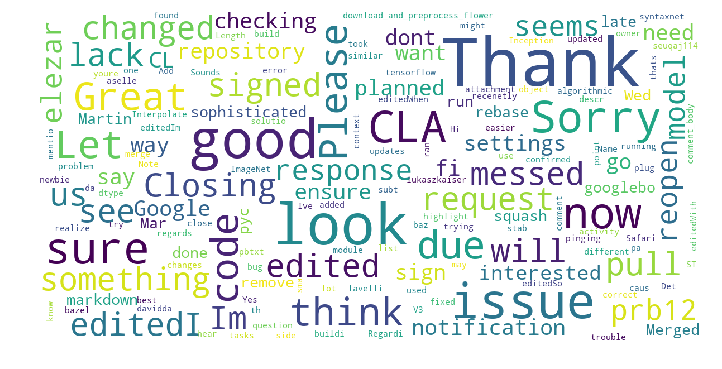

In [0]:
show_wordcloud(tf_DF.comment_body)

## Clean datasets

In [0]:
#top_fg = clean_data(top_fg)
#top_fg.head()

In [0]:
#top_cc = clean_data(top_cc)
#top_cc.head()



### Fastest growing open source projects
**Description from The State of the Octoverse**: 
*Top 10 open source projects by percent increase in contributors. This list is limited to projects that had more than 1,000 contributors in 2017—and doesn’t include projects used in MOOCs and bootcamps.*
1.	[MicrosoftDocs/azure-docs](https://github.com/MicrosoftDocs/azure-docs)	4.7X
2.	[pytorch/pytorch](https://github.com/pytorch/pytorch)	2.8X
3.	[godotengine/godot](https://github.com/godotengine/godot)	2.2X
4.	[nuxt/nuxt.js](https://github.com/nuxt/nuxt.js)	2.1X
5.	[ethereum/go-ethereum](https://github.com/ethereum/go-ethereum)	2.0X
6.	[wix/react-native-navigation](https://github.com/wix/react-native-navigation)	1.9X
7.	[spyder-ide/spyder](https://github.com/spyder-ide/spyder)	1.8X
8.	[tensorflow/models](https://github.com/tensorflow/models)	1.8X
9.	[home-assistant/home-assistant	](https://github.com/home-assistant/home-assistant)1.6X
10.	[MarlinFirmware/Marlin](https://github.com/MarlinFirmware/Marlin)	1.6X

In [66]:
%%time
msaz_c = clean_data(msaz)
msaz_c.to_csv(PATH_TO_DATA + '/data/MicrosoftDocs_azure-docs_c.csv')


CPU times: user 24.5 s, sys: 653 ms, total: 25.1 s
Wall time: 25.6 s


In [69]:
%%time
ptrch_c = clean_data(ptrch)
ptrch_c.to_csv(PATH_TO_DATA + '/data/pytorch_pytorch_c.csv')


CPU times: user 14 s, sys: 188 ms, total: 14.2 s
Wall time: 14.5 s


In [70]:
%%time
gdt_c = clean_data(gdt)
gdt_c.to_csv(PATH_TO_DATA + '/data/godotengine_godot_c.csv')


CPU times: user 21.5 s, sys: 170 ms, total: 21.7 s
Wall time: 22.1 s


In [71]:
%%time
nxt_c = clean_data(nxt)
nxt_c.to_csv(PATH_TO_DATA + '/data/nuxt_nuxt_js_c.csv')


CPU times: user 5.25 s, sys: 37.1 ms, total: 5.29 s
Wall time: 5.39 s


In [72]:
%%time
eth_c = clean_data(eth)
eth_c.to_csv(PATH_TO_DATA + '/data/ethereum_go_ethereum_c.csv')


CPU times: user 6.1 s, sys: 76.7 ms, total: 6.18 s
Wall time: 6.36 s


In [73]:
%%time
reactnn_c = clean_data(reactnn)
reactnn_c.to_csv(PATH_TO_DATA + '/data/wix_react_native_navigation_c.csv')


CPU times: user 3.76 s, sys: 34.7 ms, total: 3.79 s
Wall time: 3.86 s


In [15]:
%%time
spdr = clean_data(spdr) #
spdr.to_csv(PATH_TO_DATA + '/data/spyder_ide_spyder.csv')


CPU times: user 6.79 s, sys: 137 ms, total: 6.93 s
Wall time: 7.08 s


In [67]:
spdr.head(3)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,num_participants,comment_number,...,comment_date,contributor,author,member,collaborator,login,closed_by,closed_action,closed_at,comment_body
0,spyder-ide,spyder,Add an option to customize editors template,1,Closed,No; one; assigned,1 star; type:Enhancement,16/02/2015,2 participants,1,...,16/02/2015,False,False,False,False,spyder-bot,spyder-bot,closed this,Feb 16 2015,From pierre.raybaut on 2009-08-16T12:56:49Z ht...
1,spyder-ide,spyder,Add an option to customize editors template,1,Closed,No; one; assigned,1 star; type:Enhancement,16/02/2015,2 participants,2,...,16/02/2015,False,True,False,False,spyder-bot,spyder-bot,closed this,Feb 16 2015,From pierre.raybaut on 2009-08-16T13:19:09Z Im...
2,spyder-ide,spyder,Searching in the sphinx documentation seems to...,2,Closed,No; one; assigned,1 star; type:Bug,16/02/2015,1 participant,1,...,16/02/2015,False,False,False,False,spyder-bot,spyder-bot,closed this,Feb 16 2015,From pierre.raybaut on 2009-08-16T12:57:32Z S...


In [17]:
%%time
tf_m_c = clean_data(tf_m)
tf_m_c.to_csv(PATH_TO_DATA + '/data/tf.csv')


CPU times: user 4.41 s, sys: 58.9 ms, total: 4.47 s
Wall time: 4.59 s


In [18]:
%%time
homeas_c = clean_data(homeas)
homeas_c.to_csv(PATH_TO_DATA + '/data/home_assistant.csv')


CPU times: user 17.9 s, sys: 437 ms, total: 18.4 s
Wall time: 18.7 s


In [19]:
%%time
marlin_c = clean_data(marlin)
marlin_c.to_csv(PATH_TO_DATA + '/data/marlin.csv')


CPU times: user 15.3 s, sys: 272 ms, total: 15.6 s
Wall time: 15.9 s


### Top open source projects
**Description from The State of the Octoverse**: *Top 10 open source projects by number of unique contributors between October 1, 2017 and September 30, 2018.*

1.	[Microsoft/vscode](https://github.com/Microsoft/vscode)	19K
2.	[facebook/react-native](https://github.com/facebook/react-native)	10K
3.	[tensorflow/tensorflow](https://github.com/tensorflow/tensorflow)	9.3K
4.	[angular/angular-cli](https://github.com/angular/angular-cli)	8.8K
5.	[MicrosoftDocs/azure-docs	](https://github.com/MicrosoftDocs/azure-docs)7.8K
6.	[angular/angular](https://github.com/angular/angular)	7.6K
7.	[ansible/ansible](https://github.com/ansible/ansible)	7.5K
8.	[kubernetes/kubernetes](https://github.com/kubernetes/kubernetes)	6.5K
9.	[npm/npm](https://github.com/npm/npm)	6.1K
10.	[DefinitelyTyped/DefinitelyTyped](https://github.com/DefinitelyTyped/DefinitelyTyped)	6.0K


In [30]:
%%time
tftf_c = clean_data(tftf)
tftf_c.to_csv(PATH_TO_DATA + '/data/tensorflow_tensorflow.csv')


CPU times: user 26.5 s, sys: 548 ms, total: 27.1 s
Wall time: 27.7 s


In [32]:
tftf.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,['tensorflow','tensorflow','Add support for Python 3.x','1','Closed','girving','None yet','09/11/2015','','29 participants\n \n\n\n\n \n\n \n\n \n\n ...,1,'Contributor mrry commented Nov 9 2015...,'\n\n\n\n👍\n 2\n \n\n']
1,['tensorflow','tensorflow','Add support for Python 3.x','1','Closed','girving','None yet','09/11/2015','','29 participants\n \n\n\n\n \n\n \n\n \n\n ...,2,'Contributor girving commented Nov 9 2...,['\n']]
2,['tensorflow','tensorflow','Add support for Python 3.x','1','Closed','girving','None yet','09/11/2015','','29 participants\n \n\n\n\n \n\n \n\n \n\n ...,3,'cdnsteve commented Nov 9 2015 👍 to ...,['\n']]


In [33]:
tftf_c.head(3)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,num_participants,comment_number,...,comment_date,contributor,author,member,collaborator,login,closed_by,closed_action,closed_at,comment_body
0,tensorflow,tensorflow,Add support for Python 3.x,1,Closed,girving,None yet,09/11/2015,29 participants\n \n\n\n\n \n\n \n\n \n\n \...,1,...,09/11/2015,True,False,False,False,mrry,,None,None,Currently we only support Python 2.7 but we sh...
1,tensorflow,tensorflow,Add support for Python 3.x,1,Closed,girving,None yet,09/11/2015,29 participants\n \n\n\n\n \n\n \n\n \n\n \...,2,...,09/11/2015,True,False,False,False,girving,,None,None,Main things this involves: print -> print() ha...
2,tensorflow,tensorflow,Add support for Python 3.x,1,Closed,girving,None yet,09/11/2015,29 participants\n \n\n\n\n \n\n \n\n \n\n \...,3,...,09/11/2015,False,False,False,False,cdnsteve,,None,None,👍 to this issue


In [34]:
%%time
fbrn_c = clean_data(fbrn)
fbrn_c.to_csv(PATH_TO_DATA + '/data/facebook_react_native.csv')


CPU times: user 25.6 s, sys: 446 ms, total: 26.1 s
Wall time: 26.6 s


In [48]:
%%time
msvs_c = clean_data(msvs)
msvs_c.to_csv(PATH_TO_DATA + '/data/VS_c.csv')


CPU times: user 51.6 s, sys: 1.32 s, total: 53 s
Wall time: 53.8 s


In [36]:
%%time
deftyp_c = clean_data(deftyp)
deftyp_c.to_csv(PATH_TO_DATA + '/data/DefinitelyTyped_DefinitelyTyped.csv')


CPU times: user 21.2 s, sys: 204 ms, total: 21.4 s
Wall time: 21.7 s


In [37]:
%%time
npm_c = clean_data(npm)
npm_c.to_csv(PATH_TO_DATA + '/data/npm_npm.csv')


CPU times: user 17.2 s, sys: 240 ms, total: 17.5 s
Wall time: 17.9 s


In [43]:
%%time
kub_c = clean_data(kub)
kub_c.to_csv('/data/kubernetes_kubernetes.csv')


CPU times: user 2min, sys: 1.66 s, total: 2min 1s
Wall time: 2min 4s


In [39]:
%%time
ansib_c = clean_data(ansib)
ansib_c.to_csv(PATH_TO_DATA + 'data/ansible_ansible.csv')


CPU times: user 46.1 s, sys: 395 ms, total: 46.5 s
Wall time: 47.5 s


In [40]:
%%time
angcli_c = clean_data(angcli)
angcli_c.to_csv(PATH_TO_DATA + 'data/angular_angular_cli.csv')


CPU times: user 12.2 s, sys: 106 ms, total: 12.3 s
Wall time: 12.6 s


In [41]:
%%time
ang_c = clean_data(ang)
ang_c.to_csv(PATH_TO_DATA + 'data/angular_angular.csv')


CPU times: user 24.7 s, sys: 190 ms, total: 24.9 s
Wall time: 25.4 s
